<a href="https://colab.research.google.com/github/MIchaelllee28/Modul2/blob/main/modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

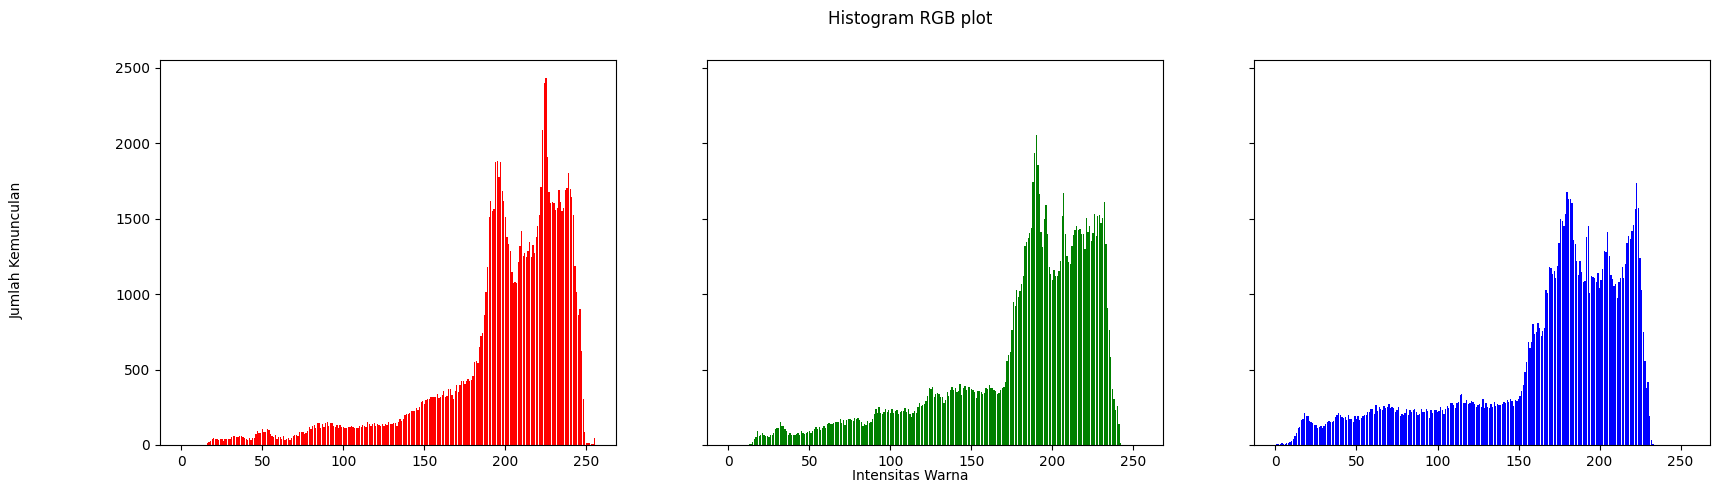

In [9]:
#Output histogram berdasarkan flowchart diatas
Michaell = cv.imread('/content/drive/MyDrive/image processing/Expressive-Cat-Nana.jfif')
height, width, depth = np.shape(Michaell)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[Michaell[y][x][0]] += 1
    green[Michaell[y][x][1]] += 1
    red[Michaell[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

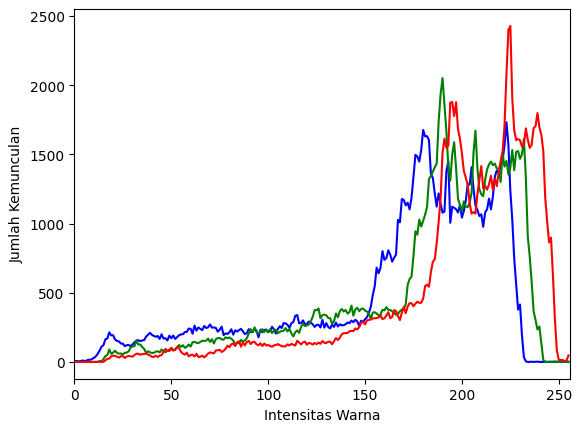

In [10]:
## 4. Buatlah histogram citra yang sama akan tetapi 
## menggunakan library yang dimiliki oleh NumPy yaitu “histogram”.
colors = ("b", "g", "r")
channel_ids = (0,1,2)

# membuat histogram plot
plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        Michaell[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show()

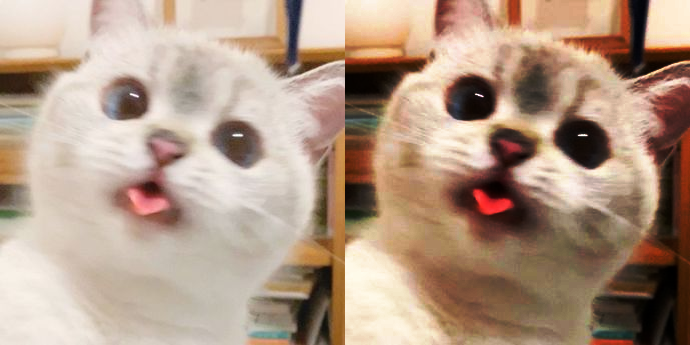

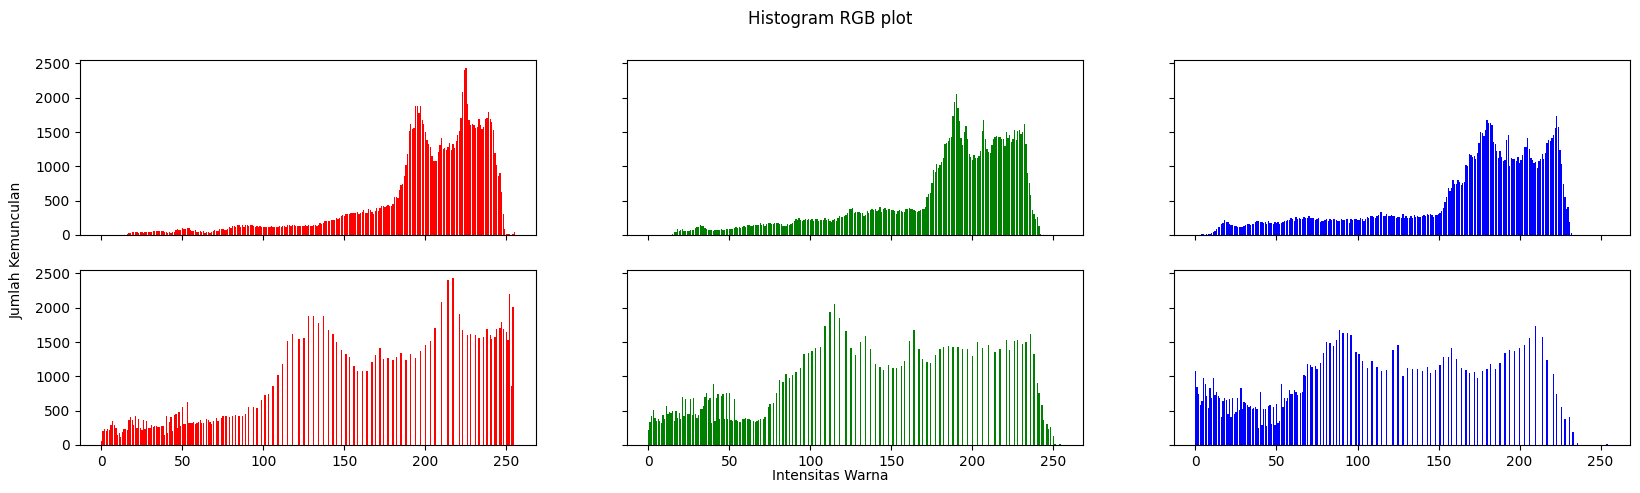

In [11]:
## 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan 
## gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan 
## flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

img = cv.imread('/content/drive/MyDrive/image processing/Expressive-Cat-Nana.jfif') 
def histog(img):
  height, width, depth = np.shape(img) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

histo_ori= histog(img)

#konversi ke array Numpy
img_array = np.asarray(img)

# 1
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalisasi
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels
chistogram_array = np.cumsum(histogram_array) #normalisasi Histogram kumulatif 
# 2
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
# 3: Transformasi
img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_ori[2], color='red') 
  axs[0,1].bar(names, histo_ori[1], color='green') 
  axs[0,2].bar(names, histo_ori[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_ori[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

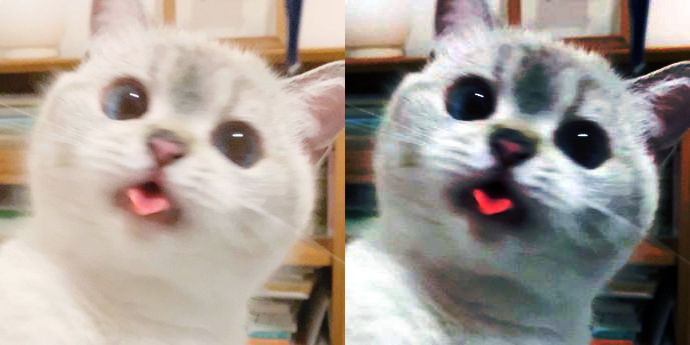

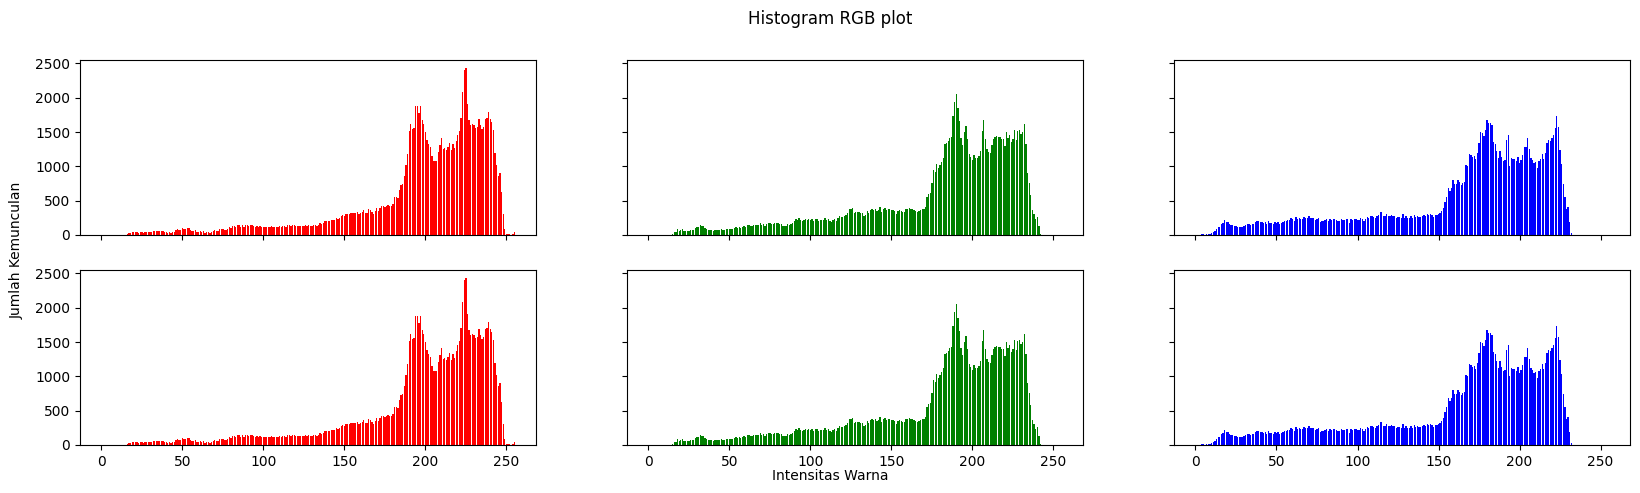

In [12]:
## 6. buatlah histogram citra yang sama akan tetapi 
## menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”.
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_ori[2], color='red')
  axs[0,1].bar(names, histo_ori[1], color='green')
  axs[0,2].bar(names, histo_ori[0], color='blue')
  axs[1,0].bar(names, histo_ori[2], color='red')
  axs[1,1].bar(names, histo_ori[1], color='green')
  axs[1,2].bar(names, histo_ori[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_ori[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')
     

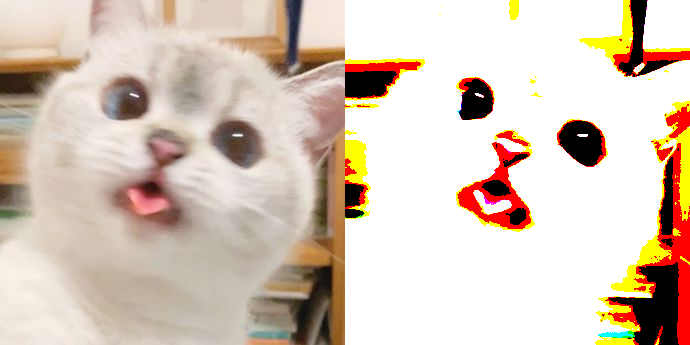

error: ignored

In [18]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img16 = cv.cvtColor(Michaell, cv.COLOR_BGR2RGB)
img8 = np.zeros(img16.shape, img16.dtype)

for y in range(0, img16.shape[0]):
  for x in range(0, img16.shape[1]):
    baru = warnaTerdekat(img16[y, x, 0], img16[y, x, 1], img16[y, x, 2])
    img8[y, x] = warnaPallette[baru]
    
img16 = cv.cvtColor(img16, cv.COLOR_BGR2RGB)
img8 = cv.cvtColor(img8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img16, img8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/image processing/Expressive-Cat-Nana.jfif', img8)